In [20]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt

1. np.random.normal：这是NumPy库中的一个函数，用于从正态分布中生成随机数。
2. 0：第一个参数指定了分布的均值（平均值）。在这里，它被设置为0，意味着生成的分布以0为中心。
3. 1：第二个参数指定了分布的标准差。标准差为1，它决定了分布的扩散或宽度。
4. (100, 2)：第三个参数指定了输出数组的形状。在这里，它是一个元组(100, 2)，这意味着您将生成100个样本，每个样本有2个值，结果是一个具有100行和2列的二维数组。
- 因此，data1 将是一个NumPy数组，形状为(100, 2)，其中包含从均值为0、标准差为1的正态分布中抽取的随机数。数组的每一行代表从这个分布中抽取的一对随机数。

In [21]:
# Step 1: Generate synthetic data生成样例数据
np.random.seed(0)  # For reproducibility
data1 = np.random.normal(0, 1, (100, 2))
data2 = np.random.normal(5, 1, (100, 2))
data = np.vstack([data1, data2])
print(data)
#显然data1，data2就是目标能分成的两个簇

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]
 [-1.04855297 -1.42001794]
 [-1.70627019  1.9507754 ]
 [-0.50965218 -0.4380743 ]
 [-1.25279536  0.77749036]
 [-1.61389785 -0.21274028]
 [-0.89546656  0.3869025 ]
 [-0.51080514 -1.18063218]
 [-0.02818223  0.42833187]
 [ 0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117]
 [-0.67246045 -0.35955316]
 [-0.81314628 -1.7262826 ]
 [ 0.17742614 -0.40178094]
 [-1.63019835  0.46278226]
 [-0.90729836  0.0519454 ]
 [ 0.72909056  0.12898291]
 [ 1.13940068 -1.23482582]
 

In [22]:
'''
#np.vstack: 这是NumPy库的一个函数，用于垂直堆叠数组，也就是将一个数组按行堆叠在另一个数组的下面,顺序的堆在下面呢
# example of vstack
data1=[[0.2,0.1],[0.3,0.4]]
data2=[[2.1,1.2],[3.3,3.4]]
data = np.vstack([data1, data2])
print(data)
'''

'\n#np.vstack: 这是NumPy库的一个函数，用于垂直堆叠数组，也就是将一个数组按行堆叠在另一个数组的下面,顺序的堆在下面呢\n# example of vstack\ndata1=[[0.2,0.1],[0.3,0.4]]\ndata2=[[2.1,1.2],[3.3,3.4]]\ndata = np.vstack([data1, data2])\nprint(data)\n'

In [23]:
# Step 2: Define the K-means algorithm functions
# Initialize centroids randomly from data points
'''
1、data.shape[0]：这部分获取了数组 data 的行数，也就是数据集中的数据点数量。

2、np.random.choice(data.shape[0], k, replace=False)：这是 NumPy 的函数 random.choice 的使用，它用于从指定的一维数组中随机抽取元素。在这里，它的参数解释如下：

data.shape[0]：表示要从中进行抽样的一维数组，即数据集 data 的行数。
k：表示要抽取的样本数量，通常用于指定您希望随机选择多少个数据点。
replace=False：这个参数表示抽样时是否允许重复选择相同的元素。在这里，由于设置为 False，所以不允许重复选择，每个数据点最多被选取一次。
'''
def initialize_centroids(data, k):#选取初始簇心
    return data[np.random.choice(data.shape[0], k, replace=False)]

# Assign each data point to the nearest centroid
def assign_labels(data, centroids):#点分配到簇
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))#点到质心的欧式距离
    return np.argmin(distances, axis=0)

In [24]:
'''
#example of assign_labels
import numpy as np
# 三个数据点
data = np.array([[1.0, 2.0], [2.0, 3.0], [5.0, 6.0]])
# 两个聚类中心
centroids = np.array([[1.0, 2.0], [4.0, 5.0]])
# 计算距离矩阵
distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
# 输出距离矩阵
print(distances)
#分配每个数据点到最近的聚类中心。这将返回一个包含索引的一维数组，其中每个索引表示对应数据点应该分配给哪个聚类中心。
assignments = np.argmin(distances, axis=0)
print(assignments)
'''

'\n#example of assign_labels\nimport numpy as np\n# 三个数据点\ndata = np.array([[1.0, 2.0], [2.0, 3.0], [5.0, 6.0]])\n# 两个聚类中心\ncentroids = np.array([[1.0, 2.0], [4.0, 5.0]])\n# 计算距离矩阵\ndistances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))\n# 输出距离矩阵\nprint(distances)\n#分配每个数据点到最近的聚类中心。这将返回一个包含索引的一维数组，其中每个索引表示对应数据点应该分配给哪个聚类中心。\nassignments = np.argmin(distances, axis=0)\nprint(assignments)\n'

In [25]:
# Recompute centroids as the mean of data points of the same cluster
def compute_centroids(data, labels, k):#get new centroids
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids  

In [26]:
# K-means clustering
def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        labels = assign_labels(data, centroids)
        new_centroids = compute_centroids(data, labels, k)
        # If centroids do not change, we are done
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

In [28]:
# Step 3: Run the K-means algorithm
k = 2  # Number of clusters
centroids, labels = kmeans(data, k)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<function matplotlib.pyplot.show(close=None, block=None)>

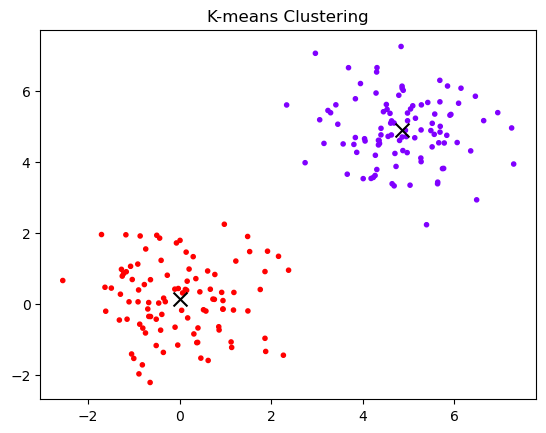

In [29]:
# Step 4: Visualize the results
'''
c=labels：这个参数指定了散点的颜色。labels 是一个包含每个数据点的标签的数组，它将决定每个数据点的颜色。不同的标签通常对应不同的颜色，因此您可以在图中看到数据点之间的差异。
cmap='rainbow'：这个参数指定了颜色映射（colormap），它决定了如何将标签映射到颜色。在这里，'rainbow' 是一种常用的颜色映射，它会根据标签值从颜色范围中选择不同的颜色。不同的标签将对应不同的颜色。
marker='.'：这个参数指定了散点的形状。在这里，散点的形状被设置为小圆点（点号）。您可以根据需要选择不同的形状，例如，'o' 表示圆圈，'s' 表示正方形，等等。
'''
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', marker='.')
#s=100：这个参数指定了聚类中心的大小，这里设置为 100，表示聚类中心的大小是默认大小的 100 倍。
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
plt.title("K-means Clustering")
plt.show